In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [5]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [6]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

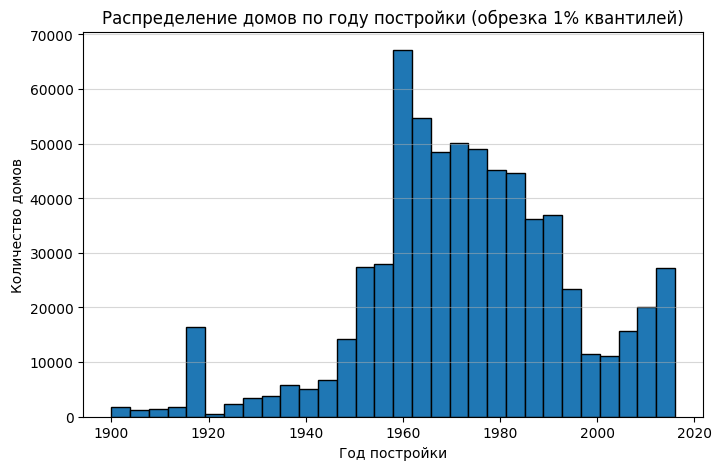

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [8]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


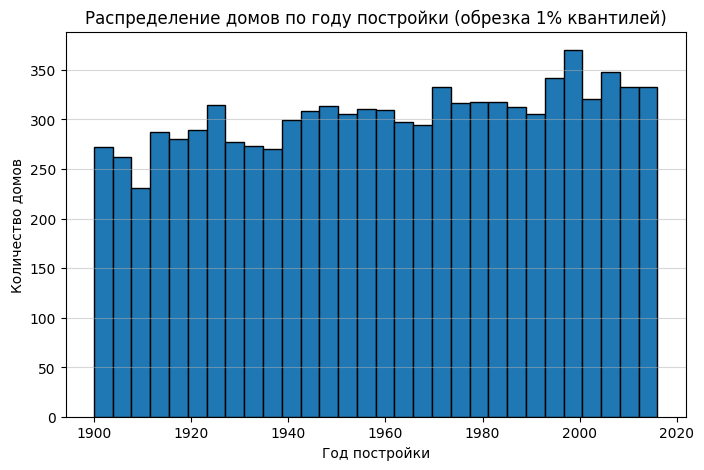

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [10]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [11]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [12]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [13]:
regions = [
    "Амурская",
    "Еврейская",
    "Забайкальский",
    "Камчатский",
    "Магаданская",
    "Приморский",
    "Бурятия",
    "Саха /Якутия/",
    "Сахалинская",
    "Хабаровский",
    "Чукотский"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [14]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
18354,Бурятия,NaN,C,NaN
18355,Бурятия,NaN,C,NaN
18356,Бурятия,NaN,C,NaN
18357,Бурятия,NaN,C,NaN
18358,Бурятия,NaN,C,NaN
...,...,...,...,...
1020399,Еврейская,1971.0,C,3367.5
1020400,Еврейская,1968.0,C,2436.9
1020401,Еврейская,1959.0,C,1103.7
1020402,Еврейская,1983.0,C,3959.1


In [15]:
df_cut.isna().sum()

formalname_region        0
built_year           46196
energy_efficiency        0
area_total           29729
dtype: int64

In [16]:
df_cut_cleaned = df_cut.dropna()


In [17]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_11952\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [18]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
18421,Бурятия,1968.0,E,3486.10,4357.625
18422,Бурятия,1981.0,E,4225.90,5282.375
18423,Бурятия,1968.0,E,4225.36,5281.700
18424,Бурятия,1968.0,E,4223.80,5279.750
18425,Бурятия,1968.0,E,4223.80,5279.750
...,...,...,...,...,...
1020399,Еврейская,1971.0,C,3367.50,2862.375
1020400,Еврейская,1968.0,C,2436.90,2071.365
1020401,Еврейская,1959.0,C,1103.70,938.145
1020402,Еврейская,1983.0,C,3959.10,3365.235


In [19]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [20]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Амурская,1690.0,E,370.5000
1,Амурская,1696.0,D,266.1000
2,Амурская,1878.0,F,408.7500
3,Амурская,1880.0,F,127.3500
4,Амурская,1883.0,F,328.8000
...,...,...,...,...
4070,Чукотский,2013.0,C,693.5150
4071,Чукотский,2014.0,C,1006.8675
4072,Чукотский,2015.0,C,1552.6950
4073,Чукотский,2016.0,C,6552.0465


In [21]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Амурская,1690.0,370.5000,3.705000e+02
1,Амурская,1696.0,266.1000,6.366000e+02
2,Амурская,1878.0,408.7500,1.045350e+03
3,Амурская,1880.0,127.3500,1.172700e+03
4,Амурская,1883.0,328.8000,1.501500e+03
...,...,...,...,...
1064,Чукотский,2013.0,748.7660,1.579045e+06
1065,Чукотский,2014.0,1006.8675,1.580052e+06
1066,Чукотский,2015.0,1552.6950,1.581604e+06
1067,Чукотский,2016.0,6552.0465,1.588156e+06


In [22]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Амурская,1690.0,370.50,370.50
1,Амурская,1696.0,266.10,636.60
2,Амурская,1878.0,408.75,1045.35
3,Амурская,1880.0,127.35,1172.70
4,Амурская,1883.0,328.80,1501.50


In [23]:
import pandas as pd

data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -29.91, -29.60, -30.30, -30.14, -30.12, -30.80, -30.46, -30.87, -29.98, -30.46,
        -29.72, -30.36, -30.33, -30.23, -30.11, -30.18, -30.07, -30.23, -29.80, -30.00,
        -29.77, -29.93, -30.11, -29.81, -30.27, -29.90, -30.01, -29.53, -29.53, -29.17,
        -29.06, -29.29, -28.93, -29.76, -29.75, -29.71, -28.96, -29.11, -28.75, -29.40,
        -28.53, -28.97, -28.32, -27.88, -28.52, -28.68, -28.03, -28.39, -27.99, -28.34,
        -28.35, -28.33, -28.16, -28.09, -27.86, -28.22, -27.55, -27.41, -27.65, -27.59,
        -27.76, -27.70, -27.44, -27.05, -27.29, -27.46, -27.19, -26.42, -26.89, -26.82,
        -26.91, -26.85, -26.96, -26.38, -26.50, -26.20, -26.16, -26.01, -26.20, -25.81,
        -26.01, -26.02, -25.88, -25.82, -25.69, -26.04, -25.73, -25.52, -25.19, -25.45,
        -25.31, -25.04, -25.56, -24.98, -24.61, -25.64, -24.90, -24.86, -24.74, -24.51,
        -24.72
    ]
}

df_fefo_climate = pd.DataFrame(data_climate)
df_fefo_climate

,Год,Зима
0,1960,-29.91
1,1961,-29.60
2,1962,-30.30
3,1963,-30.14
4,1964,-30.12
...,...,...
96,2056,-24.90
97,2057,-24.86
98,2058,-24.74
99,2059,-24.51


In [24]:

data_region_heat = {
    "Республика Бурятия": [
        3211.3, 3143.5, 3151.9, 3199.7, 3081.3, 2912.5, 2726.3, 2819.2, 
        2466.2, 2521.8, 2558.8, 2238.9, 2275.6, 2237.5, 2232.5, 2340.7, 
        2394.8, 2361.0, 2376.4, 2364.45, 2333.94, 2366.24, 2285.3, 2415.6, 2420.8
    ],
    "Республика Саха (Якутия)": [
        4329.4, 4329.4, 5331.5, 5317.6, 5549.6, 4987.8, 4994.6, 5396.2, 
        5308.9, 5307.9, 5244.6, 5392.4, 5372.0, 5367.8, 5385.6, 5411.5, 
        5541.3, 5280.7, 5727.7, 5720.06, 5903.23, 5804.51, 5717.5, 5811.6, 5841.2
    ],
    "Забайкальский край": [
        3075.2, 2741.8, 2713.8, 2645.1, 2393.7, 2473.5, 2457.26, 2622.63, 
        2703.1, 3119.2, 3202.1, 3154.3, 3288.7, 3751.2, 3697.2, 3556.0, 
        3588.4, 3569.9, 3482.5, 3517.34, 3472.85, 3512.73, 3513.6, 3574.4, 3569.5
    ],
    "Камчатский край": [
        2072.3, 1925.3, 2367.6, 2949.5, 2755.0, 3070.3, 2129.38, 2218.46, 
        2165.9, 2130.6, 2078.2, 1894.9, 1949.8, 1816.7, 1775.7, 1735.7, 
        1791.9, 1663.8, 1697.2, 1680.47, 1600.92, 1663.49, 1662.6, 1654.7, 1667.4
    ],
    "Приморский край": [
        6402.0, 6453.5, 6391.1, 6040.0, 6212.1, 6153.0, 6349.3, 6576.2, 
        6747.4, 6618.1, 6512.4, 6296.7, 5960.8, 6311.6, 5666.9, 5572.6, 
        5761.9, 5482.8, 5251.0, 5127.32, 5284.79, 5244.18, 5233.7, 5119.6, 5084.0
    ],
    "Хабаровский край": [
        8161.8, 7411.7, 7374.8, 7207.2, 7307.7, 7618.5, 6603.3, 6530.2, 
        6810.4, 7397.4, 7399.7, 7463.1, 7277.8, 7314.7, 6899.1, 6880.3, 
        7081.3, 6861.9, 6835.6, 6733.04, 6603.52, 6726.37, 6723.0, 6815.9, 6615.3
    ],
    "Амурская область": [
        2297.2, 2223.8, 2319.1, 2814.5, 2389.1, 3377.4, 3290.4, 3484.8, 
        3504.7, 3557.1, 3574.7, 3593.8, 3727.3, 3524.4, 3571.3, 3595.4, 
        3608.1, 3589.0, 3477.6, 3558.38, 3543.66, 3538.47, 3577.9, 3634.8, 3653.9
    ],
    "Магаданская область": [
        1617.7, 1732.0, 1721.2, 1601.5, 1537.2, 1553.9, 1601.7, 1478.7, 
        1432.8, 1431.8, 1394.7, 1393.8, 1393.1, 1330.5, 1264.4, 1261.5, 
        1238.1, 1219.0, 1199.9, 1202.0, 1209.26, 1218.11, 1211.86, 1205.7, 1194.1
    ],
    "Сахалинская область": [
        2177.4, 2061.5, 1922.0, 2061.8, 2054.7, 2141.6, 2059.1, 2317.2, 
        2265.6, 2336.1, 2314.7, 2302.4, 2214.3, 2087.5, 2145.5, 2061.6, 
        2149.6, 2142.6, 2099.6, 2150.62, 2196.8, 2173.51, 2207.91, 2167.5, 2180.5
    ],
    "Еврейская автономная область": [
        743.4, 837.1, 941.2, 840.7, 774.7, 736.6, 612.2, 634.8, 651.1, 
        701.5, 685.8, 665.1, 650.7, 644.6, 630.8, 580.7, 572.9, 559.5, 
        560.6, 512.44, 535.92, 532.34, 532.58, 522.2, 509.6
    ],
    "Чукотский авт.округ": [
        568.2, 559.9, 598.0, 612.5, 577.8, 558.2, 412.9, 386.7, 540.8, 
        355.6, 506.1, 519.5, 506.9, 482.9, 617.5, 491.4, 437.4, 405.7, 
        393.4, 392.19, 393.91, 420.33, 406.62, 419.2, 408.3
    ]
}


years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Республика Бурятия,3211.3,3143.5,3151.9,3199.7,3081.3,2912.5,2726.30,2819.20,2466.2,2521.8,...,2340.7,2394.8,2361.0,2376.4,2364.45,2333.94,2366.24,2285.30,2415.6,2420.8
Республика Саха (Якутия),4329.4,4329.4,5331.5,5317.6,5549.6,4987.8,4994.60,5396.20,5308.9,5307.9,...,5411.5,5541.3,5280.7,5727.7,5720.06,5903.23,5804.51,5717.50,5811.6,5841.2
Забайкальский край,3075.2,2741.8,2713.8,2645.1,2393.7,2473.5,2457.26,2622.63,2703.1,3119.2,...,3556.0,3588.4,3569.9,3482.5,3517.34,3472.85,3512.73,3513.60,3574.4,3569.5
Камчатский край,2072.3,1925.3,2367.6,2949.5,2755.0,3070.3,2129.38,2218.46,2165.9,2130.6,...,1735.7,1791.9,1663.8,1697.2,1680.47,1600.92,1663.49,1662.60,1654.7,1667.4
Приморский край,6402.0,6453.5,6391.1,6040.0,6212.1,6153.0,6349.30,6576.20,6747.4,6618.1,...,5572.6,5761.9,5482.8,5251.0,5127.32,5284.79,5244.18,5233.70,5119.6,5084.0
Хабаровский край,8161.8,7411.7,7374.8,7207.2,7307.7,7618.5,6603.30,6530.20,6810.4,7397.4,...,6880.3,7081.3,6861.9,6835.6,6733.04,6603.52,6726.37,6723.00,6815.9,6615.3
Амурская область,2297.2,2223.8,2319.1,2814.5,2389.1,3377.4,3290.40,3484.80,3504.7,3557.1,...,3595.4,3608.1,3589.0,3477.6,3558.38,3543.66,3538.47,3577.90,3634.8,3653.9
Магаданская область,1617.7,1732.0,1721.2,1601.5,1537.2,1553.9,1601.70,1478.70,1432.8,1431.8,...,1261.5,1238.1,1219.0,1199.9,1202.00,1209.26,1218.11,1211.86,1205.7,1194.1
Сахалинская область,2177.4,2061.5,1922.0,2061.8,2054.7,2141.6,2059.10,2317.20,2265.6,2336.1,...,2061.6,2149.6,2142.6,2099.6,2150.62,2196.80,2173.51,2207.91,2167.5,2180.5
Еврейская автономная область,743.4,837.1,941.2,840.7,774.7,736.6,612.20,634.80,651.1,701.5,...,580.7,572.9,559.5,560.6,512.44,535.92,532.34,532.58,522.2,509.6


In [25]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Амурская,1690.0,370.5000,3.705000e+02
1,Амурская,1696.0,266.1000,6.366000e+02
2,Амурская,1878.0,408.7500,1.045350e+03
3,Амурская,1880.0,127.3500,1.172700e+03
4,Амурская,1883.0,328.8000,1.501500e+03
...,...,...,...,...
1064,Чукотский,2013.0,748.7660,1.579045e+06
1065,Чукотский,2014.0,1006.8675,1.580052e+06
1066,Чукотский,2015.0,1552.6950,1.581604e+06
1067,Чукотский,2016.0,6552.0465,1.588156e+06


In [26]:
import pandas as pd

# Убедимся, что годы имеют правильный тип
df_grouped['built_year'] = df_grouped['built_year'].astype(int)

# Создаем полную сетку
min_year = df_grouped['built_year'].min()
all_years = range(min_year, 2025)
all_regions = df_grouped['formalname_region'].unique()

full_index = pd.MultiIndex.from_product([all_regions, all_years], 
                                       names=['formalname_region', 'built_year'])

df_full = (df_grouped.set_index(['formalname_region', 'built_year'])
           .reindex(full_index)
           .reset_index()
           .sort_values(['formalname_region', 'built_year']))

# Заполняем данные
df_full['area_eff'] = df_full.groupby('formalname_region')['area_eff'].ffill().fillna(0)
df_full['area_eff_cumsum'] = df_full.groupby('formalname_region')['area_eff'].cumsum()

In [27]:
df_merged = df_full.merge(
    df_fefo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [28]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Амурская,1554,0.00,0.000000e+00,NaN
1,Амурская,1555,0.00,0.000000e+00,NaN
2,Амурская,1556,0.00,0.000000e+00,NaN
3,Амурская,1557,0.00,0.000000e+00,NaN
4,Амурская,1558,0.00,0.000000e+00,NaN
...,...,...,...,...,...
5176,Чукотский,2020,323.51,1.629396e+06,-27.76
5177,Чукотский,2021,323.51,1.629720e+06,-27.70
5178,Чукотский,2022,323.51,1.630043e+06,-27.44
5179,Чукотский,2023,323.51,1.630367e+06,-27.05


In [29]:
import re

def clean_region_name(name: str) -> str:
    # Словарь специальных преобразований
    name_map = {
        "Республика Бурятия": "Бурятия",
        "Республика Саха (Якутия)": "Саха /Якутия/",
        "Забайкальский край": "Забайкальский",
        "Камчатский край": "Камчатский",
        "Приморский край": "Приморский",
        "Хабаровский край": "Хабаровский",
        "Амурская область": "Амурская",
        "Магаданская область": "Магаданская",
        "Сахалинская область": "Сахалинская",
        "Еврейская автономная область": "Еврейская",
        "Чукотский авт.округ": "Чукотский",
    }
    
    # Сначала проверим словарь — если есть точное совпадение
    if name in name_map:
        return name_map[name]
    
    # Универсальные замены
    name = re.sub(r"^Республика\s+", "", name, flags=re.IGNORECASE)
    name = re.sub(r"\s+область$", "", name, flags=re.IGNORECASE)
    name = re.sub(r"\s+авт\.?\.?\s*округ$", "", name, flags=re.IGNORECASE)
    name = re.sub(r"\s+край$", "", name, flags=re.IGNORECASE)

    # Чистим лишние пробелы
    name = " ".join(name.split())

    return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Амурская,1554,0.00,0.000000e+00,NaN,NaN
1,Амурская,1555,0.00,0.000000e+00,NaN,NaN
2,Амурская,1556,0.00,0.000000e+00,NaN,NaN
3,Амурская,1557,0.00,0.000000e+00,NaN,NaN
4,Амурская,1558,0.00,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
5176,Чукотский,2020,323.51,1.629396e+06,-27.76,393.91
5177,Чукотский,2021,323.51,1.629720e+06,-27.70,420.33
5178,Чукотский,2022,323.51,1.630043e+06,-27.44,406.62
5179,Чукотский,2023,323.51,1.630367e+06,-27.05,419.20


In [30]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Амурская,1554,0.00,0.000000e+00,NaN,NaN
1,Амурская,1555,0.00,0.000000e+00,NaN,NaN
2,Амурская,1556,0.00,0.000000e+00,NaN,NaN
3,Амурская,1557,0.00,0.000000e+00,NaN,NaN
4,Амурская,1558,0.00,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
5176,Чукотский,2020,323.51,1.629396e+06,-27.76,393.91
5177,Чукотский,2021,323.51,1.629720e+06,-27.70,420.33
5178,Чукотский,2022,323.51,1.630043e+06,-27.44,406.62
5179,Чукотский,2023,323.51,1.630367e+06,-27.05,419.20


In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


     built_year formalname_region  area_eff_cumsum  climate_winter
446        2000          Амурская         0.293869        0.229167
447        2001          Амурская         0.296540        0.000000
448        2002          Амурская         0.297842        0.338542
449        2003          Амурская         0.300654        0.567708
450        2004          Амурская         0.302995        0.234375


In [32]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
446,Амурская,2000,61118.5300,0.293869,0.229167,2297.20
447,Амурская,2001,102500.3190,0.296540,0.000000,2223.80
448,Амурская,2002,49954.1890,0.297842,0.338542,2319.10
449,Амурская,2003,107896.0705,0.300654,0.567708,2814.50
450,Амурская,2004,89847.0835,0.302995,0.234375,2389.10
...,...,...,...,...,...,...
5176,Чукотский,2020,323.5100,0.002383,0.630208,393.91
5177,Чукотский,2021,323.5100,0.002392,0.661458,420.33
5178,Чукотский,2022,323.5100,0.002400,0.796875,406.62
5179,Чукотский,2023,323.5100,0.002409,1.000000,419.20


Intercept: 34087.50769560231
Coef area_eff_cumsum: -6.824447960014369e-05
Coef climate_winter: -352.32873095966426


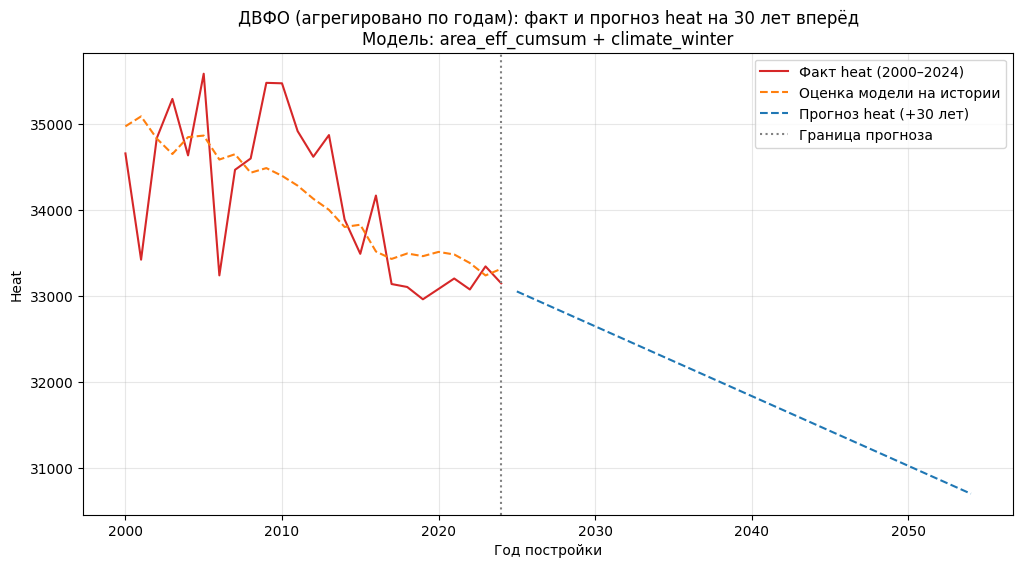

    built_year          heat  area_eff_cumsum  climate_winter     heat_pred  \
15        2015  33487.400000     1.495237e+08      -28.220000  33826.059002   
16        2016  34165.700000     1.506285e+08      -27.550000  33514.601983   
17        2017  33135.900000     1.511751e+08      -27.410000  33427.972744   
18        2018  33101.500000     1.514836e+08      -27.650000  33491.477041   
19        2019  32958.310000     1.516337e+08      -27.590000  33460.097510   
20        2020  33078.800000     1.517841e+08      -27.760000  33509.726395   
21        2021  33200.280000     1.519140e+08      -27.700000  33479.720826   
22        2022  33072.570000     1.520228e+08      -27.440000  33380.690331   
23        2023  33341.200000     1.521316e+08      -27.050000  33235.857102   
24        2024  33144.600000     1.522404e+08      -27.290000  33312.990973   
25        2025  33050.010998     1.561326e+08      -27.297500           NaN   
26        2026  32968.826336     1.570417e+08      -

In [33]:
#ДВФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ДВФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 34087.50769560231
Coef area_eff_cumsum: -6.824447960014369e-05
Coef climate_winter: -352.32873095966426

Неверные знаки, применяем жёсткую регрессию...
Жёсткая модель:
Intercept: 74.45750891242642
Coef area_eff_cumsum: 0.00016744150754944515
Coef climate_winter: -352.32873095969677
R2 жёсткой модели: -2.7285501702245143


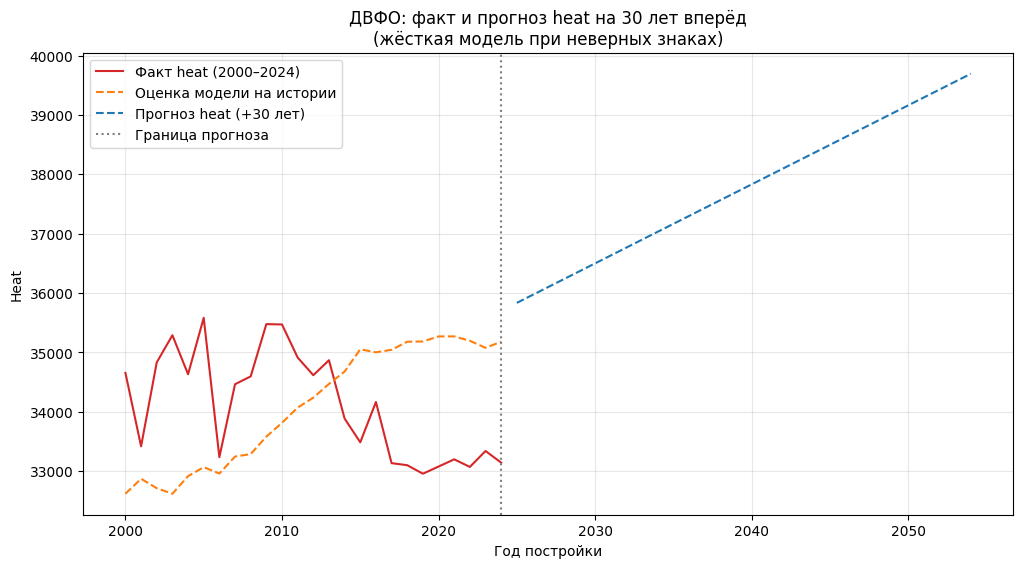

    built_year          heat     heat_pred     type
15        2015  33487.400000  35053.644082     Факт
16        2016  34165.700000  35002.573868     Факт
17        2017  33135.900000  35044.773295     Факт
18        2018  33101.500000  35180.990784     Факт
19        2019  32958.310000  35184.974977     Факт
20        2020  33078.800000  35270.061498     Факт
21        2021  33200.280000  35270.674604     Факт
22        2022  33072.570000  35197.286831     Факт
23        2023  33341.200000  35078.096323     Факт
24        2024  33144.600000  35180.872915     Факт
25        2025  35835.234351           NaN  Прогноз
26        2026  35968.297640           NaN  Прогноз
27        2027  36101.360928           NaN  Прогноз
28        2028  36234.424217           NaN  Прогноз
29        2029  36367.487505           NaN  Прогноз
30        2030  36500.550794           NaN  Прогноз
31        2031  36633.614082           NaN  Прогноз
32        2032  36766.677371           NaN  Прогноз
33        20

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ДВФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 34105.4116
Coef area_eff_cumsum (std): -458.5563021879332
Coef climate_winter (std): -163.471418961394


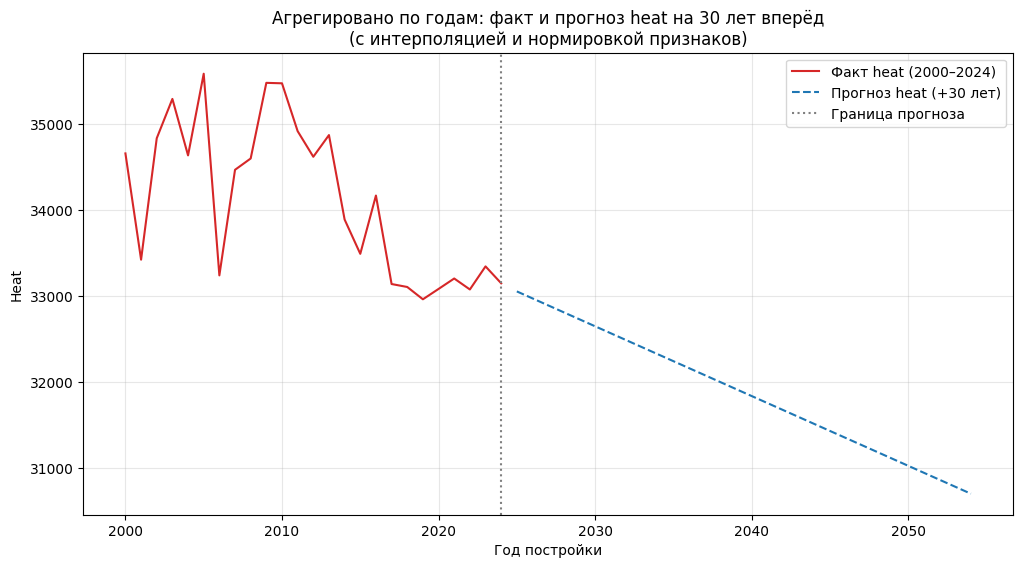

In [35]:
#ДВФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.4562
Базовые коэффициенты: [-458.55630219 -163.47141896] Intercept: 34105.4116
R2 жёсткой модели: 0.3667
Финальные коэффициенты с фиксированными знаками: [   0.         -539.89999039] Intercept: 34105.4116


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


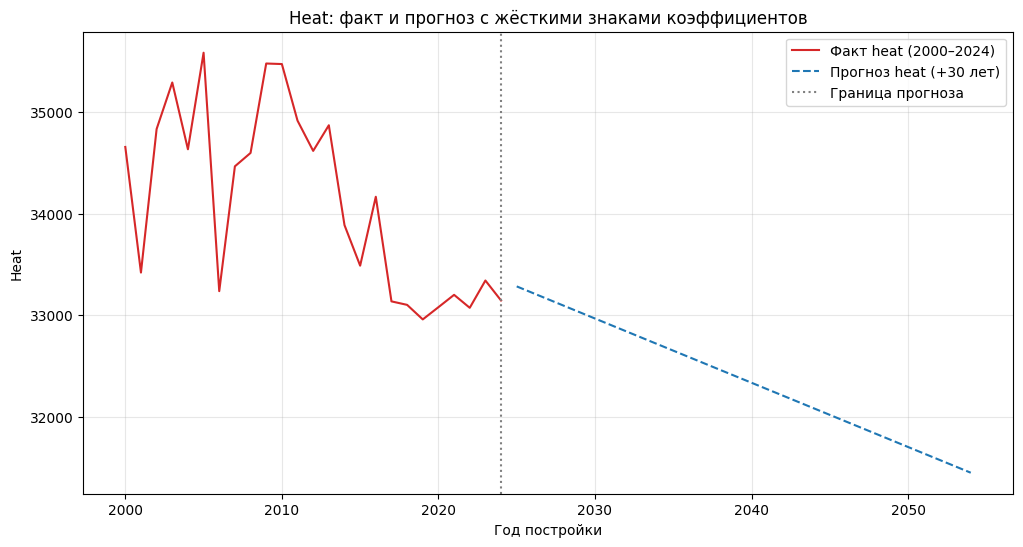

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


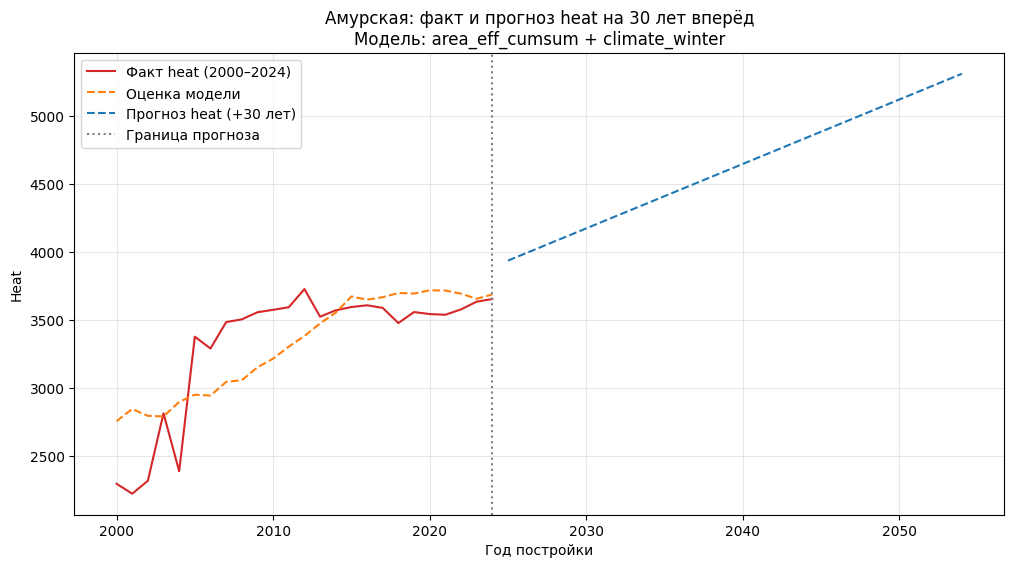

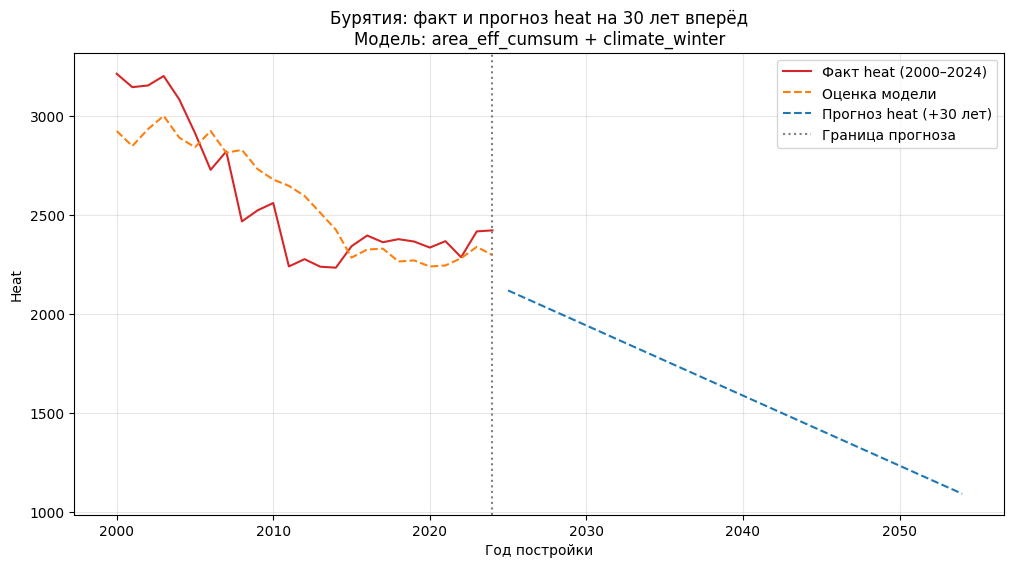

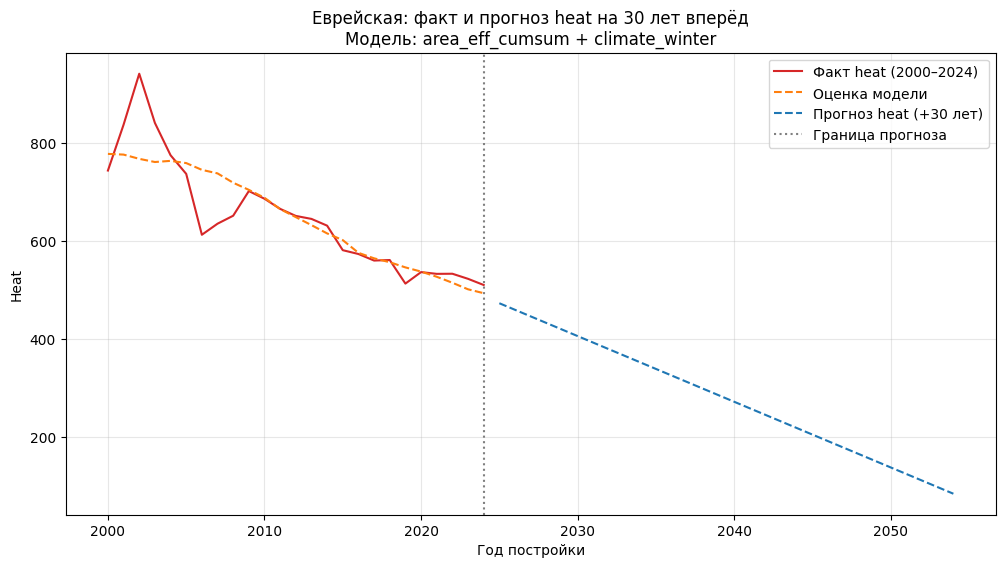

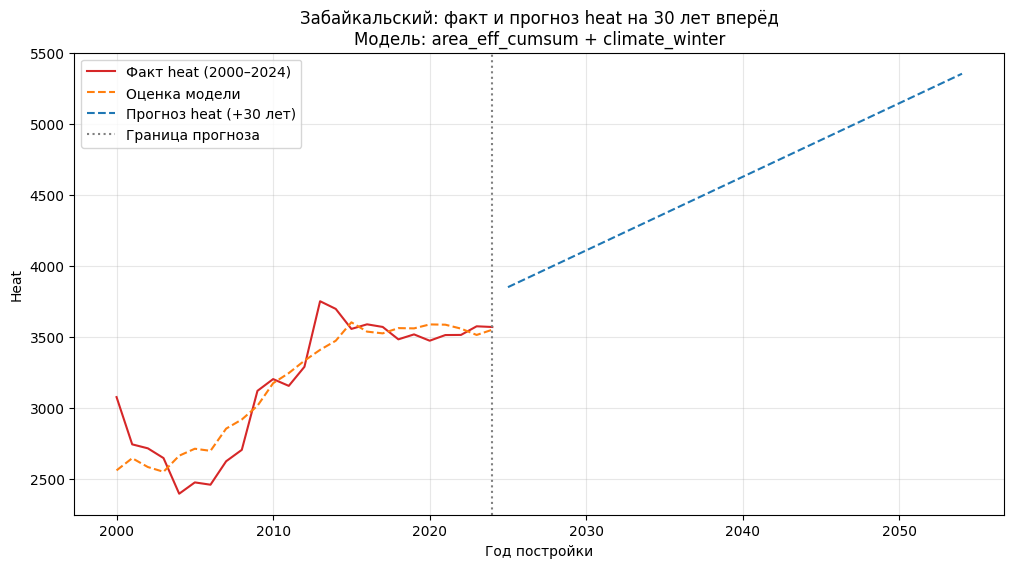

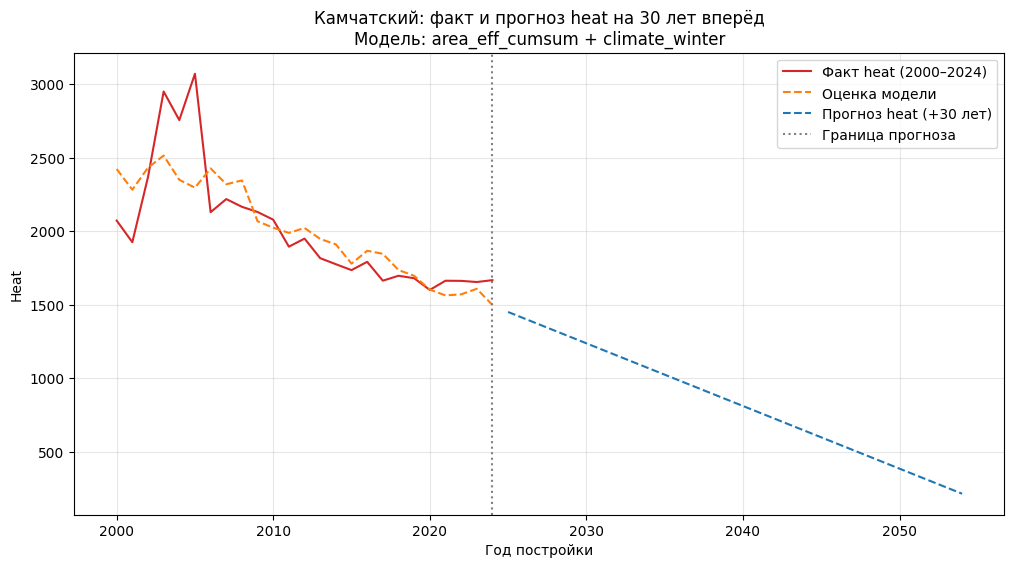

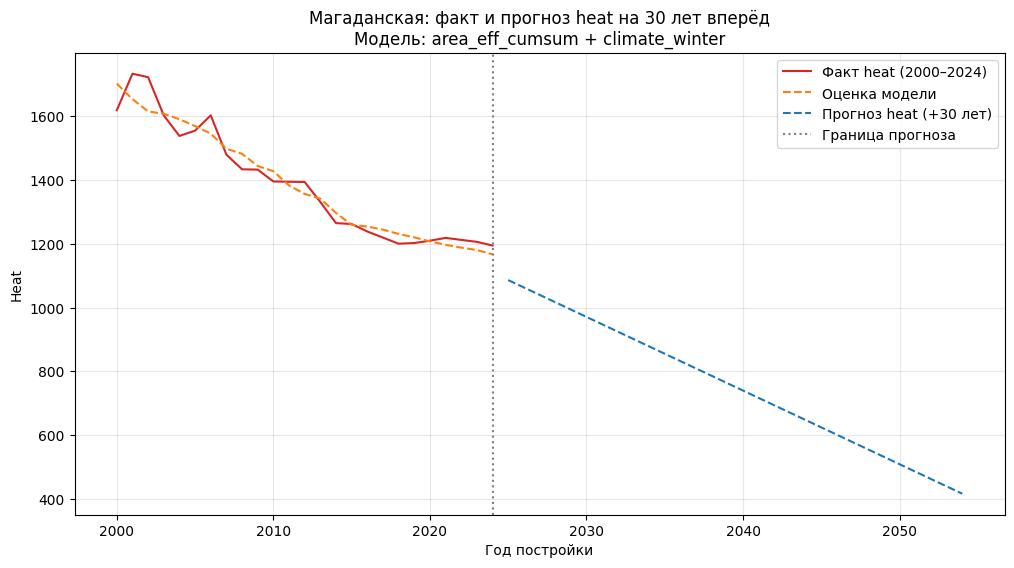

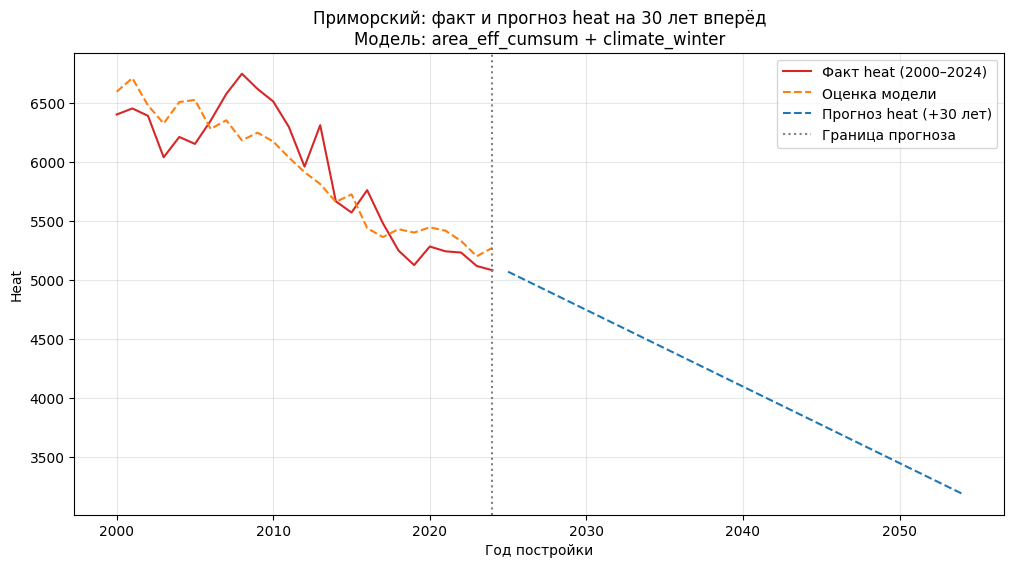

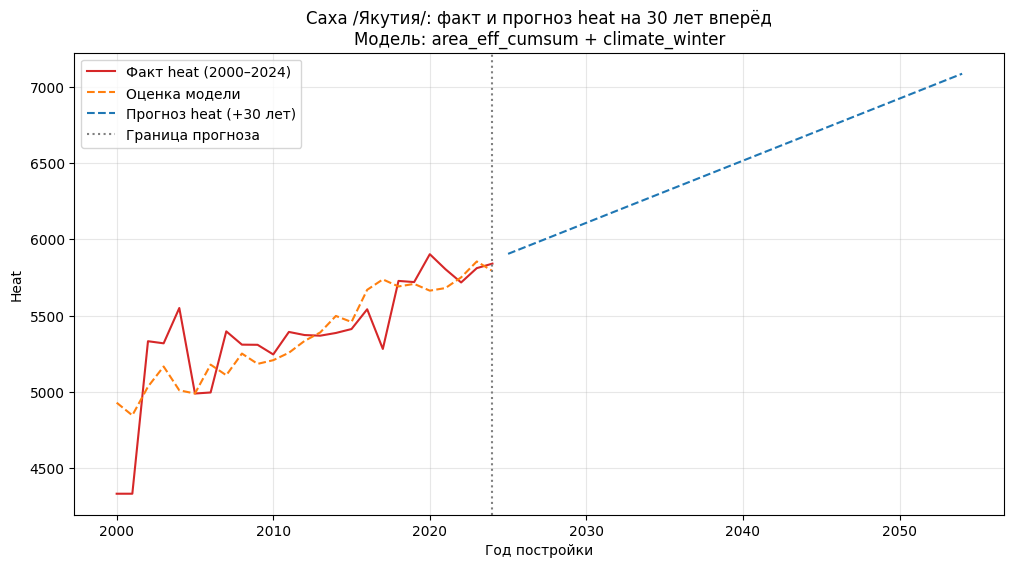

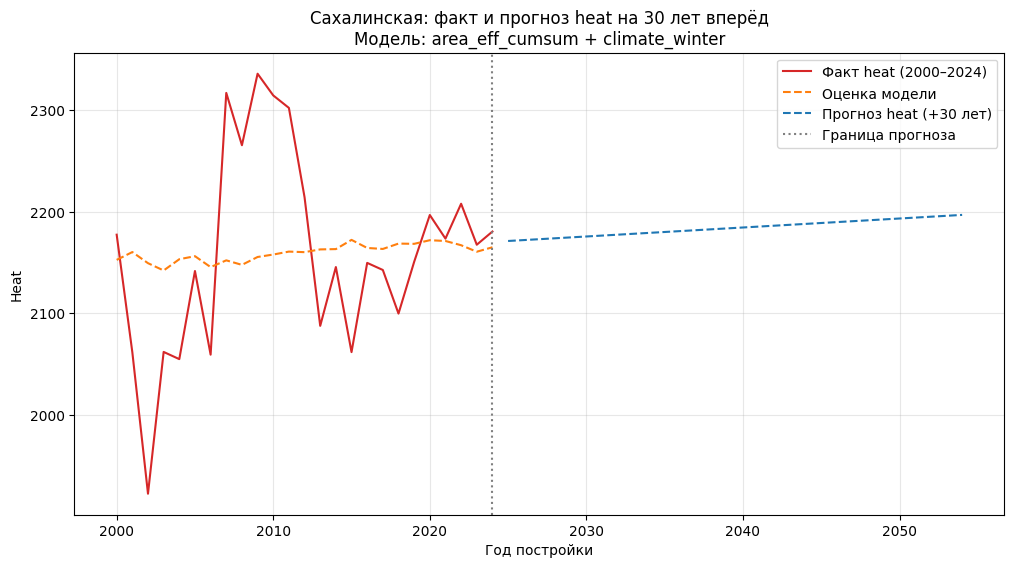

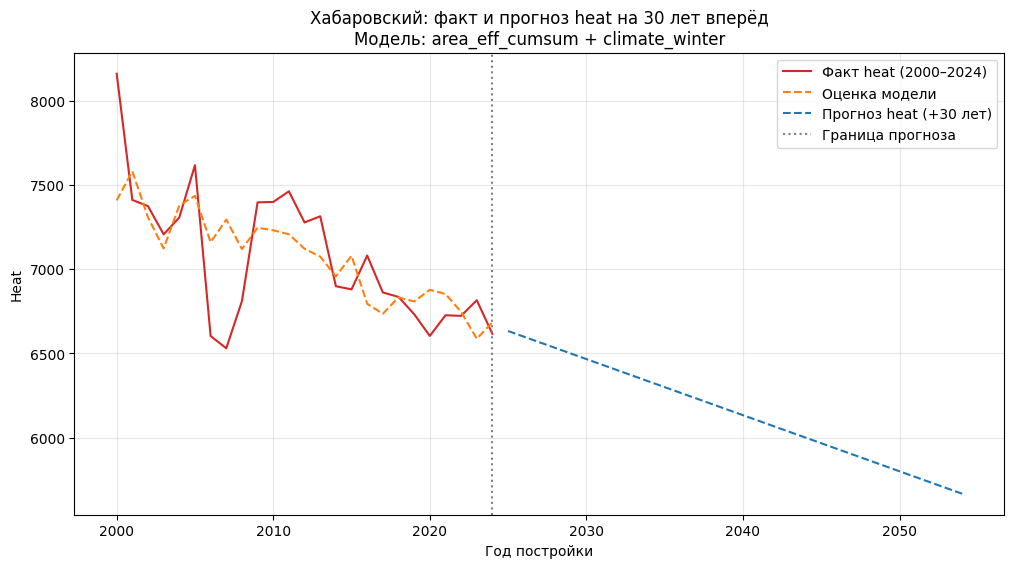

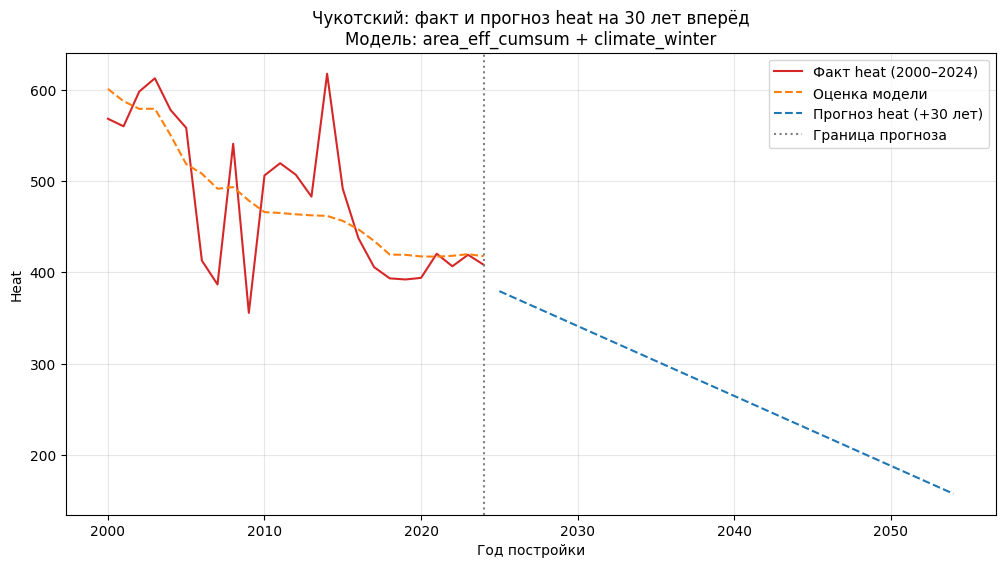

           Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0        Амурская  -5570.296628              0.000407          -109.178423   
1         Бурятия  13758.973173             -0.000699           156.616851   
2       Еврейская   2059.993755             -0.000520            -8.547612   
3   Забайкальский  -7669.039261              0.000570          -129.585389   
4      Камчатский  25574.039868             -0.002878           234.094776   
5     Магаданская  18319.058707             -0.003723             9.056628   
6      Приморский   6526.780684             -0.000250          -319.969474   
7   Саха /Якутия/  10868.619134              0.000200           265.464301   
8     Сахалинская   1450.086771              0.000018           -17.121547   
9     Хабаровский  -1809.719583             -0.000081          -409.274503   
10      Чукотский   3944.946290             -0.002058             6.253326   

          R2  
0   0.564443  
1   0.649039  
2   0.753740  
3  

In [37]:
#ДВФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


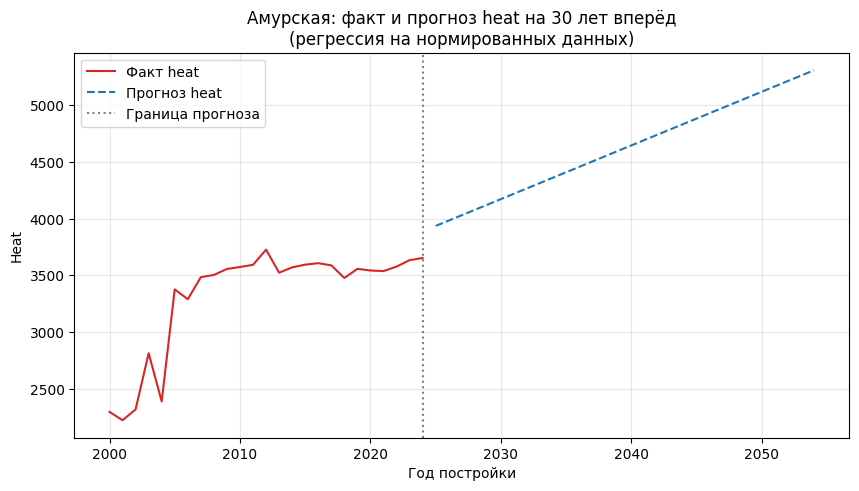

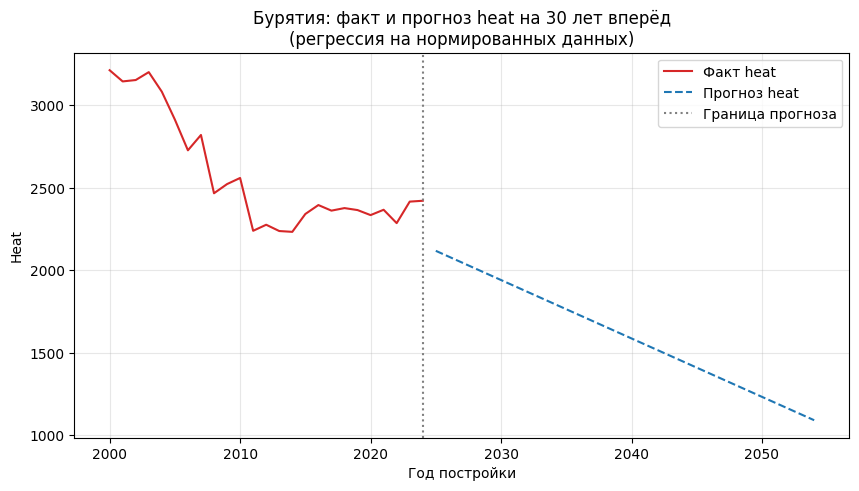

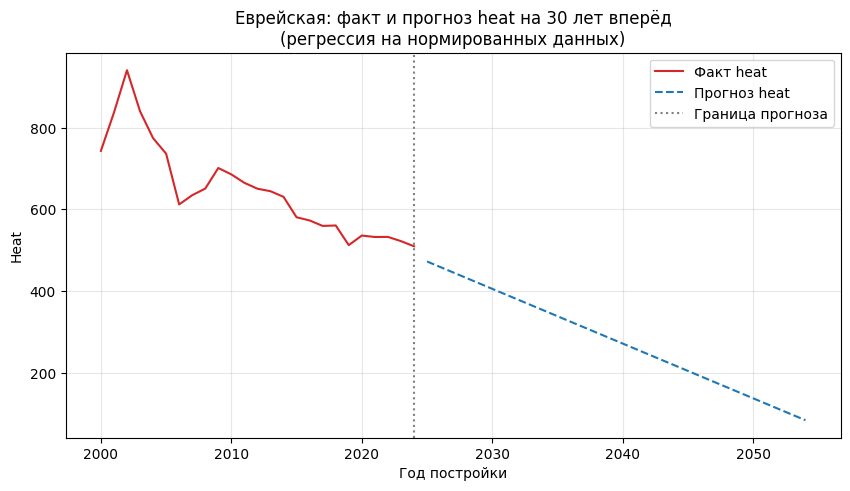

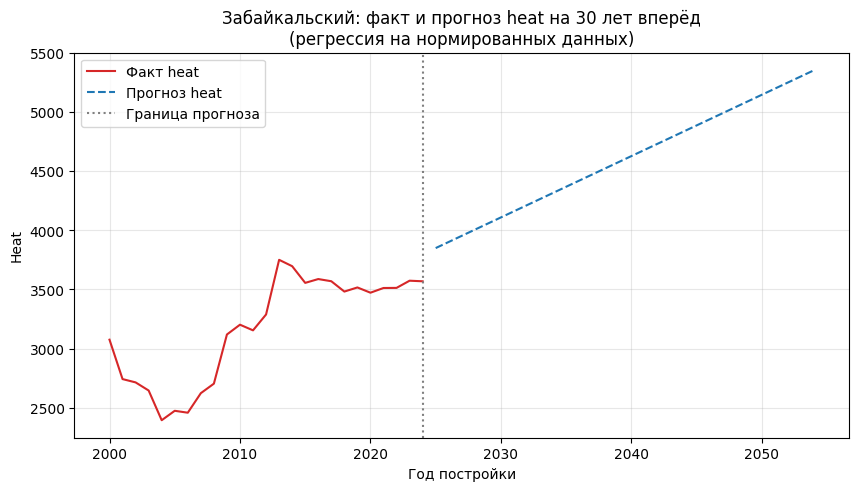

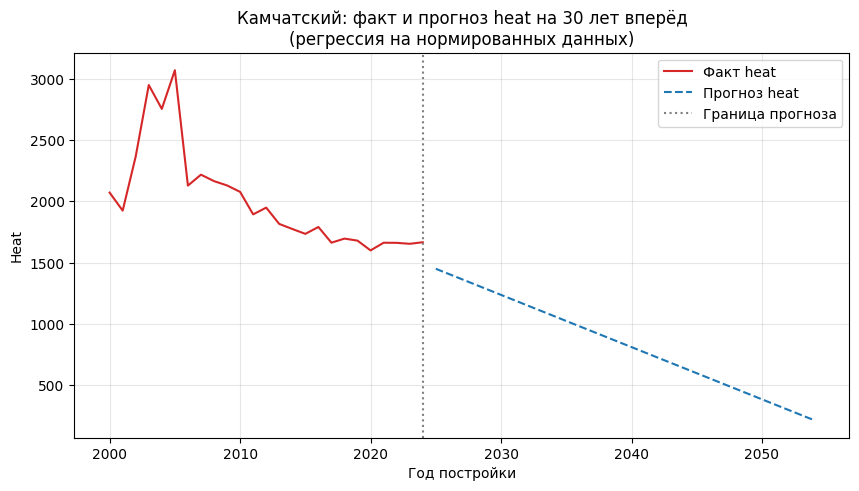

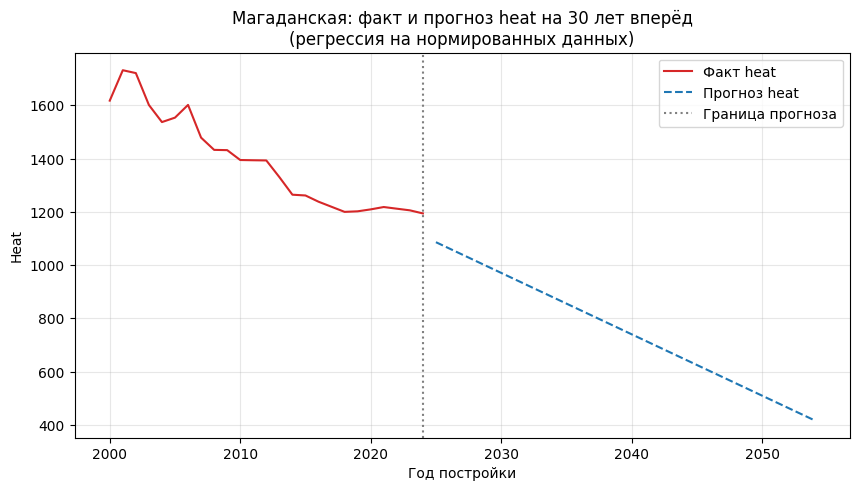

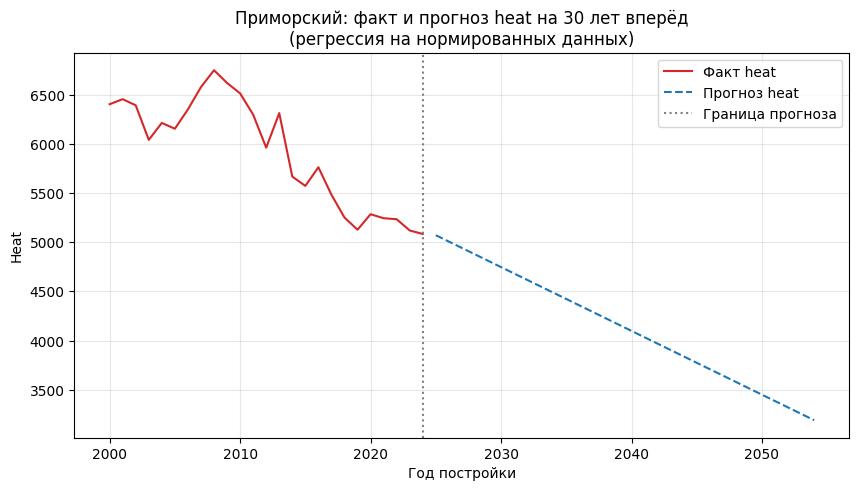

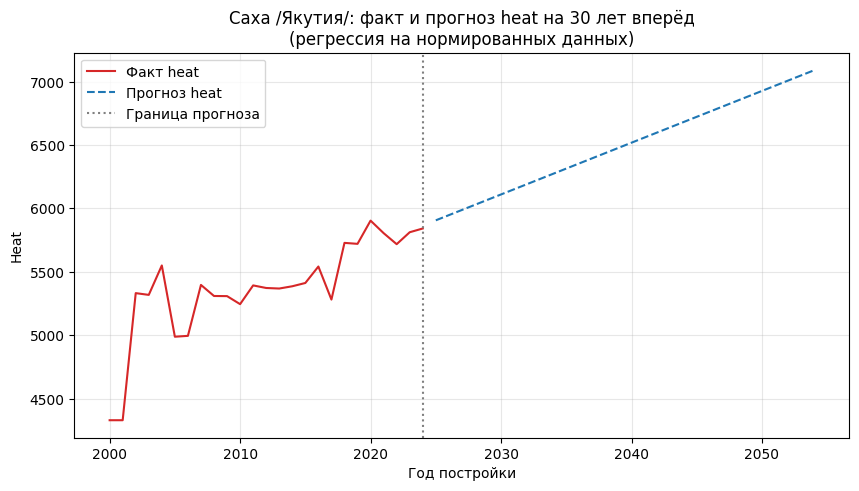

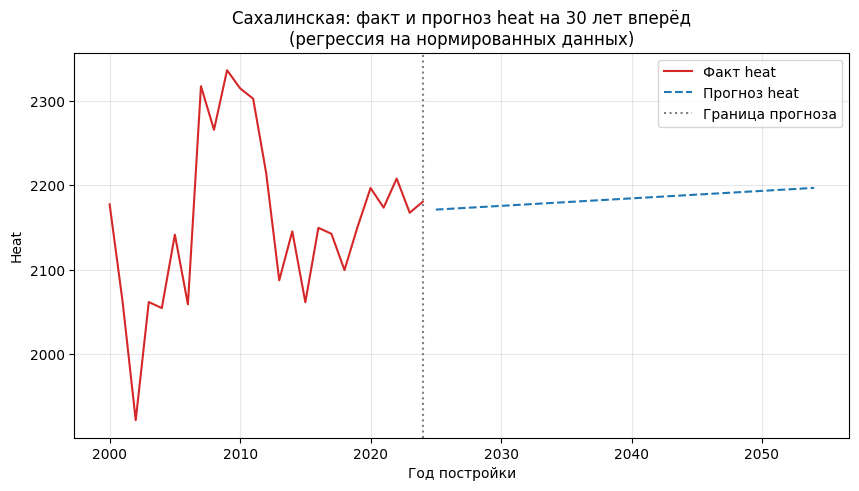

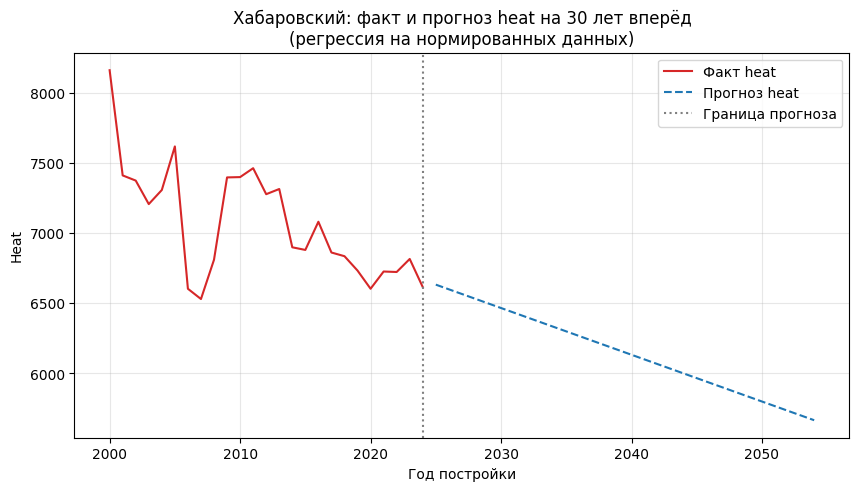

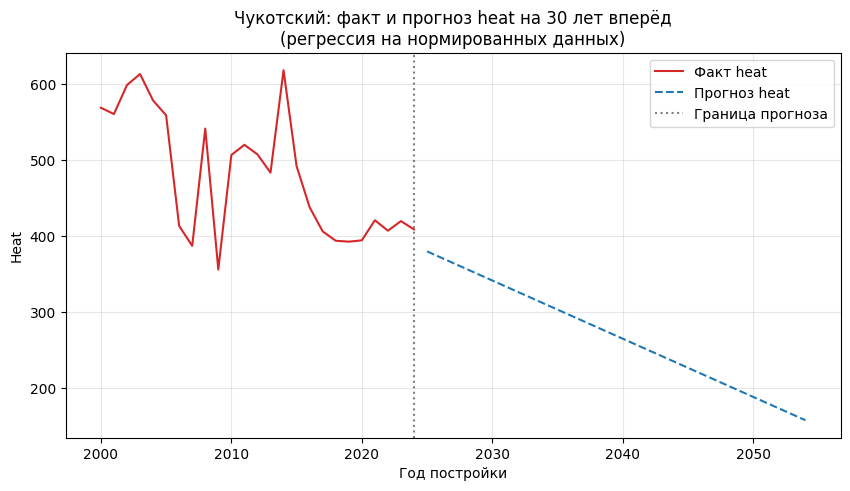

           Регион  Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0        Амурская  3321.0724            395.056649           -50.655965   
1         Бурятия  2577.4492           -326.610916            72.666168   
2       Еврейская   646.7632            -94.319167            -3.965871   
3   Забайкальский  3175.8404            442.840572           -60.124269   
4      Камчатский  2004.7128           -402.819339           108.613922   
5     Магаданская  1385.7812           -172.120294             4.202041   
6      Приморский  5914.1196           -351.319983          -148.457561   
7   Саха /Якутия/  5374.9840            194.308197           123.168570   
8     Сахалинская  2159.6656             13.546005            -7.943955   
9     Хабаровский  7066.1452            -82.741970          -189.892784   
10      Чукотский   478.8780            -60.433476             2.901381   

    R2 (на истории)  
0          0.564443  
1          0.649039  
2          0.753740  
3          

In [38]:
#ДВФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
